In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
world_dev = pd.read_csv("World_dev.csv")
#renaming columnn
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}
world_dev = world_dev.rename(col_renaming, axis=1)

In [89]:
merged = pd.merge(left= happiness2015, right = world_dev, how='left', left_on= happiness2015["Country"], right_on= world_dev["ShortName"])

In [90]:
merged.head(3)

,key_0,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0


In [91]:
#Functionn that returns last item in cell
def extract_last_word(element):
    el = str(element).split()
    return el[-1]

In [92]:
#Creting new column with last item of currencyUnit column
#Applied series.apply() <- used function to apply to series
merged["Currency Apply"] = merged["CurrencyUnit"].apply(extract_last_word)

In [93]:
merged["Currency Apply"].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Apply, dtype: object

**Python Vectorized method**

In [94]:
#New column with elements split (str), and get last item
merged["Currency Vectorized"] = merged["CurrencyUnit"].str.split().str.get(-1)
merged["Currency Vectorized"].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorized, dtype: object

**Series.apply() - length of string - on series that have null value**

In [95]:
#getting lengths of each row in CurrencyUnit
lengths = merged["CurrencyUnit"].str.len()
lengths.head(3)

0    11.0
1    13.0
2    12.0
Name: CurrencyUnit, dtype: float64

In [96]:
#Amount of values for each length amount
value_counts = lengths.value_counts(dropna=False)
value_counts.head(3)

14.0    21
4.0     20
12.0    17
Name: CurrencyUnit, dtype: int64

**Using REGEX to take strings/substrings**

In [97]:
#Pattern to be obtained from each element in the column
pattern = r"[Nn]ational accounts" #[] means either N or n (National accounts or national accounts)
pattern

'[Nn]ational accounts'

In [98]:
national_accounts = merged["SpecialNotes"].str.contains(pattern, na=False)
print(national_accounts.head(),"\n")
print("\nAmount of columns that contain 'pattern':\n", national_accounts.value_counts())

0    False
1    False
2    False
3    False
4     True
Name: SpecialNotes, dtype: bool 


Amount of columns that contain 'pattern':
 False    104
True      54
Name: SpecialNotes, dtype: int64


* str.countains returns (True if pattern, False if no pattern, and NaN if null values). The method accepts na=False to exlude null values

In [99]:
merged_national_accounts = merged[national_accounts]

**Extracting strings, years with REGEX on series**

In [100]:
#pattern with years, first digit is either 1 or 2, and the next 3 digits are 0-9
pattern = r"([1-2][0-9]{3})"
years = merged["SpecialNotes"].str.extract(pattern)

In [101]:
years = merged["SpecialNotes"].str.extract(pattern, expand=True)

**df.set_index()**

In [102]:
merged = merged.set_index("Country")

**str.extractall()**

In [103]:
pattern = r"(?P<Years>[1-2][0-9]{3})"

In [104]:
#extractall takes out pattern along with number of matches for each index value
years = merged["IESurvey"].str.extractall(pattern)
years.head()

,,Years
Country,match,
Switzerland,0,2004
Iceland,0,2010
Denmark,0,2010
Norway,0,2010
Canada,0,2010


In [105]:
#Amount of values for a given year
value_counts = years["Years"].value_counts()
value_counts.head()

2012    33
2010    28
2011    22
2013    12
2009     8
Name: Years, dtype: int64

In [106]:
#New pattern accounts for / and [0-9]{2}
pattern = r"(?P<First_Year>[1-2][0-9]{3})(/)?(?P<Second_Year>[0-9]{2})?"
years = merged["IESurvey"].str.extractall(pattern)
years.head(5)

,,First_Year,1,Second_Year
Country,match,,,
Switzerland,0,2004,NaN,NaN
Iceland,0,2010,NaN,NaN
Denmark,0,2010,NaN,NaN
Norway,0,2010,NaN,NaN
Canada,0,2010,NaN,NaN


In [107]:
#Sorting values by Second_Year to move NaN values past
years.sort_values("Second_Year").head()

,,First_Year,1,Second_Year
Country,match,,,
Kenya,0,2005,/,06
Angola,0,2008,/,09
Mozambique,0,2008,/,09
Nigeria,0,2009,/,10
Mali,0,2009,/,10


In [108]:
#Taking out / at regex
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"
years = merged["IESurvey"].str.extractall(pattern)
years = years.sort_values("Second_Year")
years.head()

,,First_Year,Second_Year
Country,match,,
Kenya,0,2005,06
Angola,0,2008,09
Mozambique,0,2008,09
Nigeria,0,2009,10
Mali,0,2009,10


In [109]:
#Extracting first two digits on First_Year
#.str[:]
first_two_year = years["First_Year"].str[0:2]
#Adding str value to Second year
years["Second_Year"] = first_two_year + years["Second_Year"]

In [110]:
years.head()

,,First_Year,Second_Year
Country,match,,
Kenya,0,2005,2006
Angola,0,2008,2009
Mozambique,0,2008,2009
Nigeria,0,2009,2010
Mali,0,2009,2010


In [111]:
pv_incomes = merged.pivot_table(values = "Happiness Score", index= "IncomeGroup")
pv_incomes

,Happiness Score
IncomeGroup,
High income: OECD,6.674000
High income: nonOECD,6.250765
Low income,3.925625
Lower middle income,4.927971
Upper middle income,5.426718


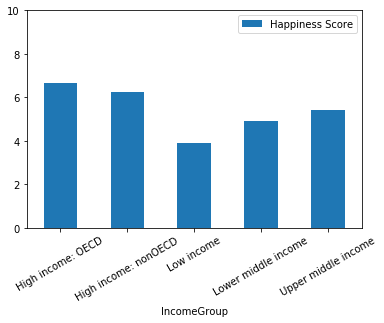

In [112]:
pv_incomes.plot(kind="bar", rot=30, ylim=(0,10))

In [120]:
#cleaning values in IncomeGroup
merged["IncomeGroup"] = merged["IncomeGroup"].str.replace(" income","").str.replace(":","").str.upper().str.strip()

In [121]:
#Pivot table with index = Income group cleaned
#value = mean Happiness Score
pv_incomes = merged.pivot_table(index="IncomeGroup", values="Happiness Score")
pv_incomes

,Happiness Score
IncomeGroup,
HIGH NONOECD,6.250765
HIGH OECD,6.674000
LOW,3.925625
LOWER MIDDLE,4.927971
UPPER MIDDLE,5.426718


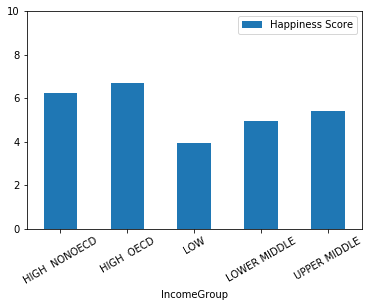

In [122]:
pv_incomes.plot(kind="bar", rot=30, ylim=(0,10))